In [1]:
# python general
import datetime as dt
from datetime import datetime
from datetime import time
from datetime import date
import time as tm

# numpy
import numpy as np

# pandas
import pandas as pd

# matplotlib
import matplotlib as mpl
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# display image in the cells of notebook
from IPython.display import Image  
from IPython.display import display

In [2]:
#----------------------------------
# Create testing data arrays
#----------------------------------

# xScale = 10
xScale = 0.01
xOffset = xScale/2.0
xData = np.random.rand(1000) * xScale - xOffset
xMin = np.min(xData)
xMax = np.max(xData)
# xRange = np.int64(xMax-xMin+0.5)
xRange = xMax - xMin
print 'xmin =',xMin,' xmax =',xMax,' xrange =',xRange

# yScale = 5
yScale = 1000000.0
yOffset = yScale/2.0
yData = np.random.rand(1000) * yScale - yOffset
yMin = np.min(yData)
yMax = np.max(yData)
# yRange = np.int64(yMax-yMin+0.5)
yRange = yMax - yMin
print 'ymin =',yMin,' ymax =',yMax,' zrange =',yRange

zScale = 3
zOffset = zScale/2.0
zData = np.random.rand(1000) * zScale - zOffset
zMin = np.min(zData)
zMax = np.max(zData)
# zRange = np.int64(zMax-zMin+0.5)
zRange = zMax - zMin
print 'zmin =',zMin,' zmax =',zMax,' zrange =',zRange

xmin = -0.00499747642306  xmax = 0.00499870762906  xrange = 0.00999618405212
ymin = -497736.783889  ymax = 497284.791339  zrange = 995021.575229
zmin = -1.49880277997  zmax = 1.49984990787  zrange = 2.99865268784


In [3]:
#-------------------------------------
# Make hist2D for xData/yData
#-------------------------------------

bins = 10
hist,xedge,yedge = np.histogram2d(xData,yData,bins)
hist = np.int64(hist)
print 'hist:\n',hist,'\n'
print 'xedge:\n',xedge,'\n'
print 'yedge:\n',yedge,'\n'

elements = (len(xedge)-1)*(len(yedge)-1)
print 'elements =',elements

hist:
[[12 11 10 11 12 12 13  9  6 11]
 [14  6 12 12  4 10 12 16 12  7]
 [ 9  6  7 12  7  9 10 12 10  9]
 [ 7  5  9 16 10 14 13 12  7  6]
 [12  9  7 15  7 13 12  5 11 11]
 [ 6  9 12 11  6 12 10 13  9 10]
 [11  6 13 12 17 15 18 15 11  5]
 [ 4 11  9  9 12 10  9  4  9 10]
 [12 11  5  9  6  6 16 12  6  6]
 [16  7 11  7  9  7  9  7 15 11]] 

xedge:
[ -4.99747642e-03  -3.99785802e-03  -2.99823961e-03  -1.99862121e-03
  -9.99002802e-04   6.15602999e-07   1.00023401e-03   1.99985241e-03
   2.99947082e-03   3.99908922e-03   4.99870763e-03] 

yedge:
[ -4.97736784e+05  -3.98234626e+05  -2.98732469e+05  -1.99230311e+05
  -9.97281538e+04  -2.25996275e+02   9.92761612e+04   1.98778319e+05
   2.98280476e+05   3.97782634e+05   4.97284791e+05] 

elements = 100


In [4]:
#-----------------------------
# Define color maps
#-----------------------------

# mycolormap = cm.jet
mycolormap = cm.coolwarm
# mycolormap = cm.autumn
# mycolormap = cm.hot
# mycolormap = cm.Greys

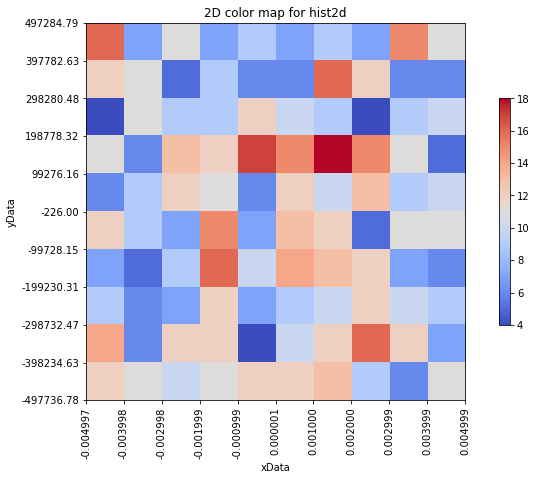

In [5]:
#-----------------------------
# Hist2D - Color Map
#-----------------------------

# create the extents
if xScale>yScale:
    xx = 1
    yy = xScale/yScale
else:
    xx = yScale/xScale
    yy = 1
extent = [xedge[0]*xx, xedge[-1]*xx, yedge[0]*yy, yedge[-1]*yy]  # window of painting

# create figure
fig = plt.figure(figsize=[12,8],facecolor='white')  # 12(inches) by 8(inches)
# fig = plt.figure(facecolor='white')   # use default fig size

# create plot
ax = fig.add_subplot(111)

# draw plot
ax.imshow(hist,extent=extent,cmap=mycolormap,interpolation='nearest', 
          origin='lower')
ax.set_xlabel('xData')
ax.set_ylabel('yData')
ax.set_title('2D color map for hist2d')

# NEW! - marking axis-x/y
ax.set_xticks((xedge*xx).tolist())   # ticks of axis-x
ax.set_xticklabels(['{:1.6f}'.format(x) for x in xedge.tolist()],rotation='vertical')
ax.set_yticks((yedge*yy).tolist())   # ticks of axis-y
ax.set_yticklabels(['{:1.2f}'.format(y) for y in yedge.tolist()])
# NEW! - shrink plot to make x-axis visible
bbox = ax.get_position()
bbox.y0 += 0.1
ax.set_position(bbox)  # set bottom of plot to show x-ticks

# draw colorbar
nrm = mpl.colors.Normalize(np.min(hist),np.max(hist))   # create color series
csubplt,kw = mpl.colorbar.make_axes(ax,shrink=0.6)
mpl.colorbar.ColorbarBase(csubplt,cmap=mycolormap,norm=nrm)  # draw colorbar

# show plot
plt.show()

In [6]:
# Image(filename='figure_mpl_hist2d_colormap.png')

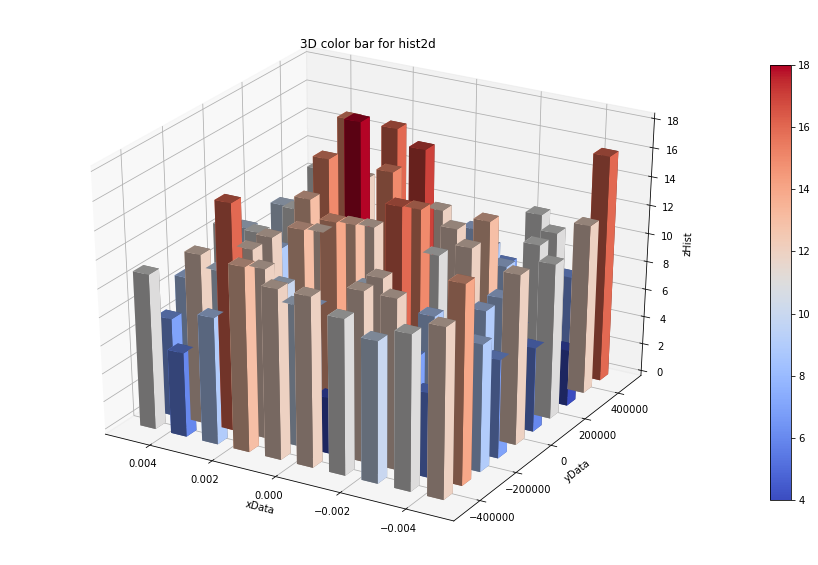

In [7]:
#-----------------------------
# Hist2D - 3D Color Bars
#-----------------------------

wratio = 0.5  # 占空比

xpos,ypos = np.meshgrid(xedge[:-1]+(0.5*wratio*xRange/bins),
                        yedge[:-1]+(0.5*wratio*yRange/bins))
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(elements)

dx = np.ones_like(zpos)*(wratio*xRange/bins)
dy = np.ones_like(zpos)*(wratio*yRange/bins)
dz = hist.flatten()

# create figure
fig = plt.figure(figsize=[16,10],facecolor='white')   # 16(inches) by 10(inches)
# fig = plt.figure(facecolor='white')   # use default fig size

# create plot
ax = fig.add_subplot(111,projection='3d')

# create color list
nrm = mpl.colors.Normalize(np.min(dz),np.max(dz))   # create color series
colors = mycolormap(nrm(dz))

# draw plot
# ax.bar3d(xpos,ypos,zpos,dx,dy,dz,color=colors)
ax.bar3d(xpos,ypos,zpos,dx,dy,dz,color=colors)
ax.invert_xaxis()         # NEW! - invert axis-x
ax.set_xlabel('xData')
ax.set_ylabel('yData')
ax.set_zlabel('zHist')
ax.set_title('3D color bar for hist2d')

# draw colorbar
cax,kw = mpl.colorbar.make_axes(ax,shrink=0.8)
mpl.colorbar.ColorbarBase(cax,cmap=mycolormap,norm=nrm)  # draw colorbar


# show plot
plt.show()

In [8]:
# Image(filename='figure_mpl_hist2d_3dbar.png')

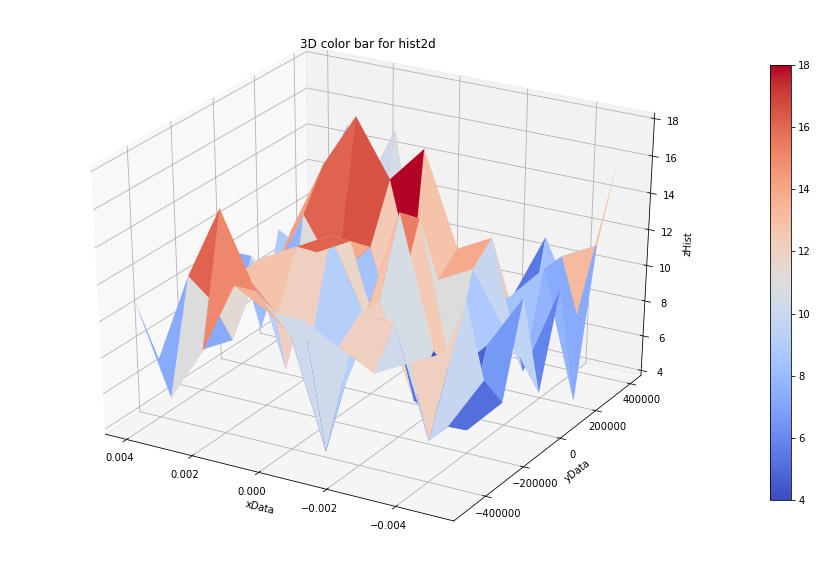

In [9]:
#-----------------------------
# Hist2D - 3D Surface
#-----------------------------

x,y = np.meshgrid(xedge[:-1],yedge[:-1])  # make coordinates of X/Y
z = hist

# create figure
fig = plt.figure(figsize=[16,10],facecolor='white')   # 16(inches) by 10(inches)
# fig = plt.figure(facecolor='white')   # use default fig size

# create plot
ax = fig.add_subplot(111,projection='3d')

# draw plot
surf = ax.plot_surface(x,y,z,rstride=1, cstride=1,cmap=mycolormap)
ax.invert_xaxis()        # NEW! - invert the axis-x
ax.set_xlabel('xData')
ax.set_ylabel('yData')
ax.set_zlabel('zHist')
ax.set_title('3D color bar for hist2d')

# draw color bar
nrm = mpl.colors.Normalize(np.min(z),np.max(z))   # create color series
cax,kw = mpl.colorbar.make_axes(ax,shrink=0.8)
mpl.colorbar.ColorbarBase(cax,cmap=mycolormap,norm=nrm)  # draw colorbar

# show plot
plt.show()

In [10]:
# Image(filename='figure_mpl_hist2d_3dsurface.png')

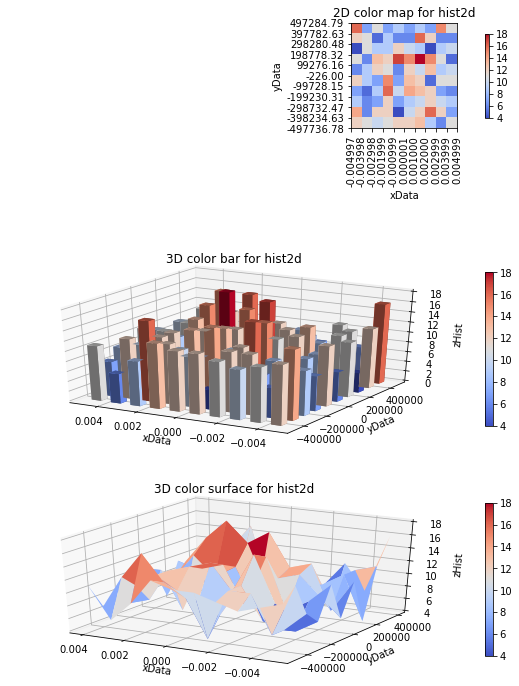

In [11]:
#--------------------------------
# 3 hist plots in 1 figure
#--------------------------------

# Create figure canvas
fig = plt.figure(figsize=[10,12],facecolor='white')   # 10(inches) by 12(inches)
# fig = plt.figure(facecolor='white')   # use default fig size


#------------------------------------------
# <1> 2D color map for hist2d:
# NEW! - create the extents
if xScale>yScale:
    xx = 1
    yy = xScale/yScale
else:
    xx = yScale/xScale
    yy = 1
extent = [xedge[0]*xx, xedge[-1]*xx, yedge[0]*yy, yedge[-1]*yy]  # window of painting

# create plot-1
ax1 = fig.add_subplot(311)  # 3row by 1col, ax1=plot#1

# draw plot-1
ax1.imshow(hist,extent=extent,cmap=mycolormap,interpolation='nearest',
           origin='lower')
ax1.set_xlabel('xData')
ax1.set_ylabel('yData')
ax1.set_title('2D color map for hist2d')

# NEW! - marking axis-x/y
ax1.set_xticks((xedge*xx).tolist())   # ticks of axis-x
ax1.set_xticklabels(['{:1.6f}'.format(x) for x in xedge.tolist()],rotation='vertical')
ax1.set_yticks((yedge*yy).tolist())   # ticks of axis-y
ax1.set_yticklabels(['{:1.2f}'.format(y) for y in yedge.tolist()])
# NEW! - shrink the plot to make x-axis visible
bbox = ax1.get_position()
bbox.y0 += 0.1
ax1.set_position(bbox)  # set bottom of plot to show x-ticks

# draw colorbar of plot-1
nrm = mpl.colors.Normalize(np.min(hist),np.max(hist))   # create color series
cax1,kw = mpl.colorbar.make_axes(ax1,shrink=0.8)
mpl.colorbar.ColorbarBase(cax1,cmap=mycolormap,norm=nrm)  # draw colorbar


#------------------------------------------
# <2> 3D color bar for hist2d:
wratio = 0.5  # 占空比

xpos,ypos = np.meshgrid(xedge[:-1]+(0.5*wratio*xRange/bins),
                        yedge[:-1]+(0.5*wratio*yRange/bins))
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(elements)

dx = np.ones_like(zpos)*(wratio*xRange/bins)
dy = np.ones_like(zpos)*(wratio*yRange/bins)
dz = hist.flatten()

# create plot-2
ax2 = fig.add_subplot(312,projection='3d')  # 3row by 1col, ax2=plot#2

# make color list for plot-2
nrm = mpl.colors.Normalize(np.min(dz),np.max(dz))   # create color series
colors = mycolormap(nrm(dz))

# draw plot-2
ax2.bar3d(xpos,ypos,zpos,dx,dy,dz,color=colors)
ax2.invert_xaxis()   # NEW! - invert axis-x
ax2.set_xlabel('xData')
ax2.set_ylabel('yData')
ax2.set_zlabel('zHist')
ax2.set_title('3D color bar for hist2d')

# draw colorbar of plot-2
cax2,kw = mpl.colorbar.make_axes(ax2,shrink=0.8)
mpl.colorbar.ColorbarBase(cax2,cmap=mycolormap,norm=nrm)  # draw colorbar


#------------------------------------------
# <3> 3D color surface for hist2d
x,y = np.meshgrid(xedge[:-1],yedge[:-1])
z = hist

# create plot-3
ax3 = fig.add_subplot(313,projection='3d') # 3row by 1col, ax3=plot#3

# draw plot-3
ax3.plot_surface(x,y,z,rstride=1, cstride=1,cmap=mycolormap)
ax3.invert_xaxis()   # NEW! - invert axis-x
ax3.set_xlabel('xData')
ax3.set_ylabel('yData')
ax3.set_zlabel('zHist')
ax3.set_title('3D color surface for hist2d')

# draw colorbar of plot-3
nrm = mpl.colors.Normalize(np.min(z),np.max(z))   # create color series
cax3,kw = mpl.colorbar.make_axes(ax3,shrink=0.8)
mpl.colorbar.ColorbarBase(cax3,cmap=mycolormap,norm=nrm)  # draw colorbar


#-----------------------------------
# show plots
plt.show()   # draw 3 plots in one figure

In [12]:
# Image(filename='figure_mpl_hist2d_3in1.png')

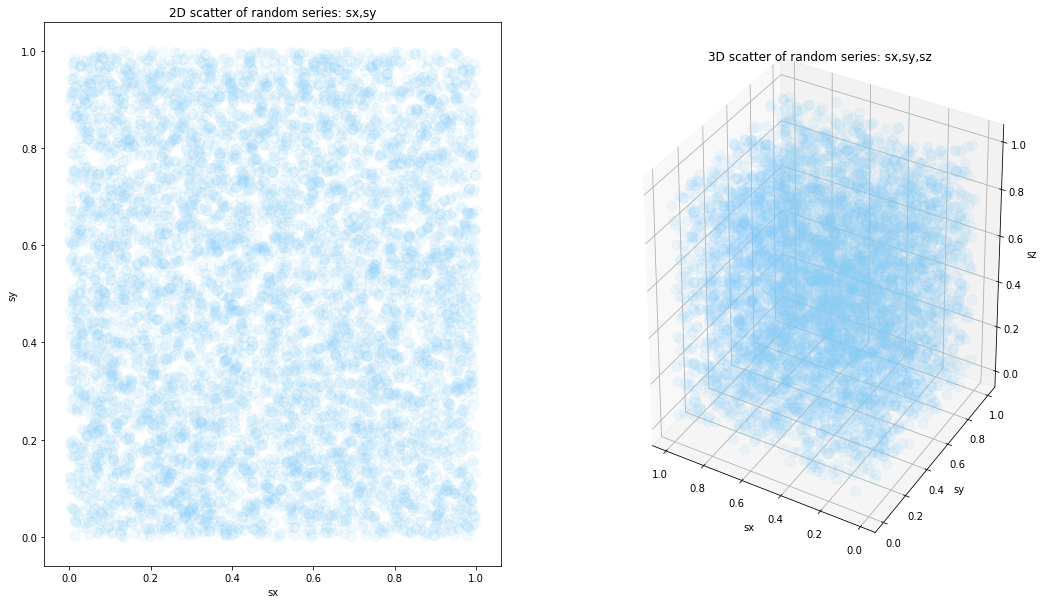

In [13]:
#--------------------------------
# 2D/3D Scatter of random series
#--------------------------------

sx = np.random.rand(6000)
sy = np.random.rand(6000)
sz = np.random.rand(6000)

# dotcolor = 'grey'
# dotcolor = 'blue'
dotcolor = 'lightskyblue'
# dotcolor = 'limegreen'
dotsize = 100            # size of dot circle
dotalpha = 0.1           # ratio of dot transparency

# create figure canvas
fig = plt.figure(figsize=[18,10],facecolor='white')   # 16(inches) by 10(inches)
# fig = plt.figure(facecolor='white')   # use default fig size

# draw plot-1
ax1 = fig.add_subplot(121)                 # 1row by 2col, ax1=plot#1
ax1.scatter(sx,sy,s=dotsize,c=dotcolor,alpha=dotalpha)
ax1.set_xlabel('sx')
ax1.set_ylabel('sy')
ax1.set_title('2D scatter of random series: sx,sy')

# draw plot-2
ax2 = fig.add_subplot(122,projection='3d') # 1row by 2col, ax2=plot#2
ax2.scatter(sx,sy,sz,s=dotsize,c=dotcolor,alpha=dotalpha)
ax2.invert_xaxis()    # NEW! - invert axis-x
ax2.set_xlabel('sx')
ax2.set_ylabel('sy')
ax2.set_zlabel('sz')
ax2.set_title('3D scatter of random series: sx,sy,sz')

# show plot
plt.show()  # draw 2 plots in one figure

In [14]:
# Image(filename='figure_mpl_scatter.png')